# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-2**<br>
**Profesora:** Paula Aguirre <br>

## Clase 16: Análisis Exploratorio de Datos.

---

## 2. Caso de Estudio: Análisis de Votaciones Presidenciales en EEUU 2020.


### 2.1 Descripción del Dataset.

Los datos para este problema correspoden a los resultados de las elecciones presidenciales 2020 de EEUU (Biden vs. Trump), a nivel de condados. Además, se incluyen algunas variables sociodemográficos y resultados de elecciones anteriores.

Estos datos pueden ser visualizados en el siguiente mapa de USA Today:

https://www.usatoday.com/in-depth/graphics/2020/11/10/election-maps-2020-america-county-results-more-voters/6226197002/


### 2.2 Objetivo.

Analizar el comportamiento de distintos estados y condados en las elecciones presidenciales estadounidenses 2020. Por ejemplo, algunas preguntas que podríamos responder a partir de los datos son:

- ¿Cómo se distribuyen los condados donde ganó la opción demócrata (Biden) o republicana (Trump)?
- ¿En qué se parecen/diferencian?
- ¿Hay correlaciones entre el porcentaje de voto demócrata (o republicano) y otras variables políticas o sociodemográficas?
- ¿Es el comportamiento de un condado o estado, predictor de otro?
- ¿Hay similitudes entre los swing states?

## 3. Desarrollo.



In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Lectura de Datos.

La librería Pandas implemente métodos de lectura de distintos tipos de datos, entre ellos datos en formato `csv`, mediante la función `read_csv`:

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html


In [3]:
dat=pd.read_csv('county_election_results.csv')
dat.columns

Index(['Unnamed: 0', 'FIPS', 'eevp', 'electTotal', 'electionDate', 'level',
       'office', 'state', 'winner', 'votes_R_2020', 'votes_D_2020',
       'votes_third_party_2020', 'votes_total_2020', 'export_time',
       'acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service',
       'pct_pop25+_bachelor_higher', 'median_household_income',
       'per_capita_income', 'category_education', 'category_income',
       'category_nonwhite', 'category_jobs_management',
       'category_jobs_service', 'pew_classification', 'region',
       'category_unemployment', 'date', 'POPESTIMATE2019', 'deaths',
       'deaths_per_thousand', 'deaths_percap_pctile', 'cases',
       'cases_per_thousand', 'cases_percap_pctile', 'case_pct_change',
       'BLS_Area_Code', 'Month', 'Month_Str', 'Labor Force', 'Employment',
       'Unemployment', 'Unemployment Rate', 'county', 'pct_2000_dem',
       'pct_2000_gre', 'pct_2000_rep', 'pct_2004_dem', 'pct_2004_rep',
       'pct_2008_dem', 'pct_2008_rep', 'pct_

### Análisis Exploratorio.

#### 3.1 Chequeos generales.

In [4]:
dat.head()

,Unnamed: 0,FIPS,eevp,electTotal,electionDate,level,office,state,winner,votes_R_2020,...,votes_2000,votes_2004,votes_2008,votes_2012,votes_2016,category_2016_dem,category_2016_rep,votes_d_2016,votes_r_2016,votes_cast_pct_2016
0,0,1061,100,0,2020-11-03,FIPSCode,presidential,AL,R,10848,...,9559,10520,11657,11320,11758,NaN,top 10% Trump by percent vote,1525,9994,1.065913
1,1,1021,100,0,2020-11-03,FIPSCode,presidential,AL,R,16085,...,15092,16693,17785,17462,18369,NaN,top 10% Trump by percent vote,2911,15081,1.049649
2,2,1049,100,0,2020-11-03,FIPSCode,presidential,AL,R,24767,...,20285,24135,24015,23863,25826,NaN,top 10% Trump by percent vote,3622,21405,1.134438
3,3,1093,100,0,2020-11-03,FIPSCode,presidential,AL,R,12205,...,11756,12875,12355,12105,12984,NaN,top 10% Trump by percent vote,1432,11274,1.061537
4,4,1059,100,0,2020-11-03,FIPSCode,presidential,AL,R,10376,...,11103,12269,11693,10859,12040,NaN,NaN,2197,9466,1.043854


In [5]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3112 non-null   int64  
 1   FIPS                        3112 non-null   int64  
 2   eevp                        3112 non-null   int64  
 3   electTotal                  3112 non-null   int64  
 4   electionDate                3112 non-null   object 
 5   level                       3112 non-null   object 
 6   office                      3112 non-null   object 
 7   state                       3112 non-null   object 
 8   winner                      3112 non-null   object 
 9   votes_R_2020                3112 non-null   int64  
 10  votes_D_2020                3112 non-null   int64  
 11  votes_third_party_2020      3112 non-null   int64  
 12  votes_total_2020            3112 non-null   int64  
 13  export_time                 3112 

In [7]:
dat.Unemployment.describe()

count      3112.000000
mean       4408.965296
std       20498.124963
min           3.000000
25%         288.000000
50%         745.000000
75%        2204.000000
max      818251.000000
Name: Unemployment, dtype: float64

In [17]:
dat['votes_D_2020'].sum()+dat['votes_R_2020'].sum()+dat['votes_third_party_2020'].sum()

157691234

In [14]:
81284666+74224319

155508985

#### 3.2 Estadísticas de resumen


- **Media** (`np.mean()`): es la suma de todos los valores, dividida por el número de puntos.
 
$$\mu=\frac{1}{n} \sum_{i=1}^n x_i $$

- **Mediana** (`np.median()`): es el valor medio de un conjunto de datos. Es inmune a valores extremos o outliers. Para calcularla, se ordenan los datos y se elige el valor que queda en la mitad. 
 
- **Percentiles** (`np.percentile()`): el percentil $p$, corresponde al valor que es mayor al $p\%$ de los datos.


- **Varianza** (`np.var()`): promedio de la distancia cuadrática de los datos a la media. Es una medida de la dispersión de los datos.

$$\rm{Var}=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2$$

- **Desviación estándar** (`np.std()`): es la raíz cuadrada de la varianza. Está en la misma escala de unidades que los datos.

$$\sigma=\sqrt{\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2}$$

- **Covarianza** (`np.cov()`): es una medida de cómo dos cantidades varían juntas.
Es la media del producto entre las diferencias de los valores respecto a la media.

$$\rm{Cov} (x,y)=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})$$

- **Coeficiente de correlación de Pearson** (`np.corrcoef`): para tener una medida más general y aplicable de la correlación entre dos variables, necesitamos que sea adimensional. Por lo tanto dividimos la covarianza por las desviaciones estándar de $x$ e $y$. Esto define el coeficiente de correlación de Pearson ($\rho$).

$$\rho=\frac{\rm{Cov} (x,y)}{\sigma_x \sigma_y}$$


#### Analicemos las principales estadísticas de resumen de los datos. ¿ Qué conclusiones útiles podemos obtener?

In [26]:
dat['Unemployment Rate'].max()

22.9

In [19]:
dat['Unemployment Rate'].std()

2.5127456916633446

In [25]:
np.percentile(dat['Unemployment Rate'],100)

22.9

In [51]:
dat['winner'].value_counts()

R    1965
D    1147
Name: winner, dtype: int64

In [36]:
pd.pivot_table(dat,columns='winner',values=['Unemployment Rate','acs_pct_pop_nonwhite'],aggfunc='mean')

winner,D,R
Unemployment Rate,7.281517,6.233486
acs_pct_pop_nonwhite,24.271650,22.612101


### Algunas preguntas a responder:
- ¿CUántso condados ganó cada candidato?
- ¿Hay diferencias en los ingresos per capita entre condados que votaron demócrata o republicano?
- ¿Hay diferencias ene l nivel educacional?
- ¿Son homogéneos los estados D/R en cuanto a ingresos, desempleo, educación?

#### 3.3 Análisis Gráfico Univariado.

Podemos utilizar múltiples funcionalidades de `matplotlib`y `seaborn` para realizar un análisis exploratorio gráfico de los datos.

`Funciones de interés:`

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html




Text(0, 0.5, 'N')

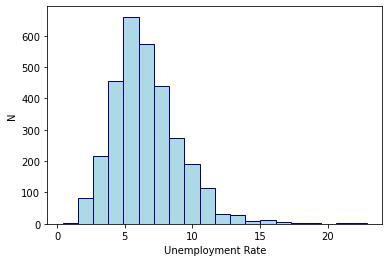

In [16]:
#histograma
fig=plt.figure()
ax=fig.add_subplot(111)

var='Unemployment Rate'
#bins=np.arange(0,100,10)
n,bins,patches=ax.hist(dat[var],histtype='bar',ec='darkblue',fc='lightblue',bins=20)
ax.set_xlabel(var)
ax.set_ylabel('N')

**Binning bias.**

Lo histogramas son informativos y permiten entender las características genelares de nuestros datos, pero la gran desventaja, es que los mismos datos pueden interpretarse de distinta forma dependiendo de la elección de bins. La elección del número de bins es arbitraria, lo cual puede generar sesgos (binning bias). Adicionalmente, en un histograma no estamos graficando todos los datos, sino que los agrupamos en bins, y por lo tanto perdemos sus valores. Una regla común es usar un número de bins igual a la raíz cuadrada del número de muestras.

In [50]:
dat['pct_D']=dat['votes_D_2020']/dat['votes_total_2020']*100
dat['pct_R']=dat['votes_R_2020']/dat['votes_total_2020']*100

55


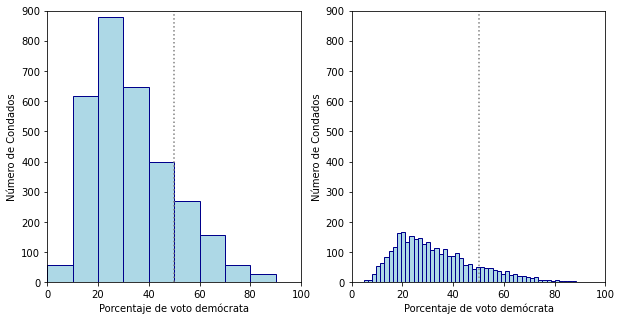

In [53]:
#Notar las diferencias de binning
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

bins=np.arange(0,100,10)
nbins=int(np.sqrt(len(dat)))
print(nbins)
_=ax1.hist(dat['pct_D'],bins=bins,histtype='bar',ec='darkblue',fc='lightblue')
_=ax2.hist(dat['pct_D'],bins=nbins,histtype='bar',ec='darkblue',fc='lightblue')

for ax in [ax1,ax2]:
    ax.set_xlabel('Porcentaje de voto demócrata')
    ax.set_ylabel('Número de Condados')
    ax.axvline(x=50,ls=':',color='gray')
    ax.set_ylim(0,900)
    ax.set_xlim(0,100)


### Histplot


### Boxplot